In [1]:
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


In [2]:
data = pd.read_csv('data/train.csv')
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')
data.head(5)

There are 10000 rows and 10 columns


,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [3]:
test = pd.read_csv('data/test.csv')
nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns')
test.head(5)

There are 10000 rows and 9 columns


,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  int64  
 1   cost_of_ad                  10000 non-null  float64
 2   device_type                 10000 non-null  object 
 3   gender                      9731 non-null   object 
 4   in_initial_launch_location  10000 non-null  int64  
 5   income                      10000 non-null  int64  
 6   n_drivers                   10000 non-null  int64  
 7   n_vehicles                  10000 non-null  int64  
 8   prior_ins_tenure            10000 non-null  int64  
 9   outcome                     10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


In [27]:
permutation = np.random.permutation(data['gender'])
end = len(permutation)
data['gender'] = data['gender'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  int64  
 1   cost_of_ad                  10000 non-null  float64
 2   device_type                 10000 non-null  object 
 3   gender                      10000 non-null  object 
 4   in_initial_launch_location  10000 non-null  int64  
 5   income                      10000 non-null  int64  
 6   n_drivers                   10000 non-null  int64  
 7   n_vehicles                  10000 non-null  int64  
 8   prior_ins_tenure            10000 non-null  int64  
 9   outcome                     10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


In [25]:
data['gender'].value_counts()

F    5122
M    4878
Name: gender, dtype: int64

In [4]:
data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')], axis=1)
data.drop(['gender'], axis=1, inplace=True)

In [5]:
labelencoder = LabelEncoder()
data['device_type'] = labelencoder.fit_transform(data['device_type'])

In [6]:
outcome = data.outcome
data = data.drop('outcome', axis = 1)
data = data.join(outcome)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  int64  
 1   cost_of_ad                  10000 non-null  float64
 2   device_type                 10000 non-null  object 
 3   in_initial_launch_location  10000 non-null  int64  
 4   income                      10000 non-null  int64  
 5   n_drivers                   10000 non-null  int64  
 6   n_vehicles                  10000 non-null  int64  
 7   prior_ins_tenure            10000 non-null  int64  
 8   outcome                     10000 non-null  int64  
 9   gender_F                    10000 non-null  uint8  
 10  gender_M                    10000 non-null  uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 722.8+ KB


0    9018
1     982
Name: outcome, dtype: int64

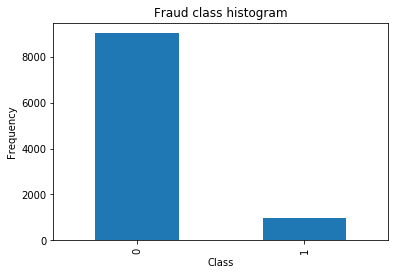

In [7]:
pd.value_counts(data['outcome']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['outcome'].value_counts()

In [8]:
from sklearn.preprocessing import StandardScaler

data['income'] = StandardScaler().fit_transform(data['income'].values.reshape(-1, 1))
data.head()

,age,cost_of_ad,device_type,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,gender_F,gender_M,outcome
0,56,0.005737,2,0,0.271938,2,1,4,0,1,0
1,50,0.004733,1,0,0.364899,2,3,2,1,0,0
2,54,0.004129,3,0,1.467674,1,3,7,0,1,0
3,16,0.005117,0,0,-1.609606,2,3,0,1,0,0
4,37,0.003635,1,0,1.071019,2,1,5,0,1,0


In [9]:
X = data.iloc[:,:10]  
y = data.iloc[:, 10]
X.head()

,age,cost_of_ad,device_type,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,gender_F,gender_M
0,56,0.005737,2,0,0.271938,2,1,4,0,1
1,50,0.004733,1,0,0.364899,2,3,2,1,0
2,54,0.004129,3,0,1.467674,1,3,7,0,1
3,16,0.005117,0,0,-1.609606,2,3,0,1,0
4,37,0.003635,1,0,1.071019,2,1,5,0,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=135)

In [11]:
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

parameters = {
    'C': np.linspace(1, 10, 10),
    
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    3.9s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [12]:
clf.best_params_

{'C': 1.0}

In [73]:
best_lr = LogisticRegression(C=0.9, penalty='l1', solver='saga')
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [78]:
y_train_pre = best_lr.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
print(cnf_matrix_tra)
print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
roc=roc_auc_score(y_test, best_lr.predict_proba(X_test)[:,1])

roc

[[6295   18]
 [ 621   66]]
Recall metric in the train dataset: 9.606986899563319%


0.8088511544847896

In [75]:
y_pre = best_lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
print(cnf_matrix)
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

[[2689   16]
 [ 263   32]]
Recall metric in the testing dataset: 10.847457627118644%


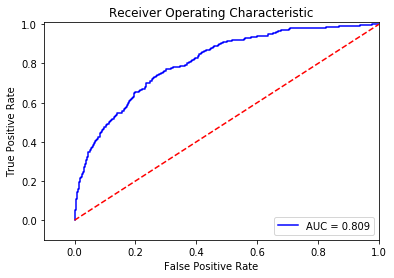

In [76]:
y_pred_sample_score = best_lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.907
LogisticRegression log_loss is 0.260
LogisticRegression auc is 0.809


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


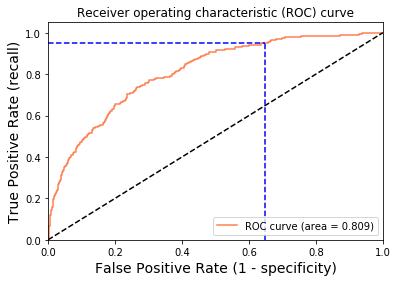

Using a threshold of 0.029 guarantees a sensitivity of 0.953 and a specificity of 0.351, i.e. a false positive rate of 64.88%.


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

logreg = LogisticRegression(C=2, penalty='l2', solver='saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [81]:
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC

In [82]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

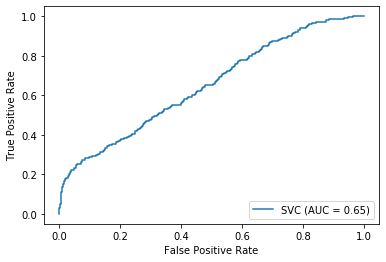

In [83]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

In [84]:
from imblearn.over_sampling import SMOTE